In [1]:
import numpy as np
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

### 1.a)

Registros con y1
520
Registros con y2
480


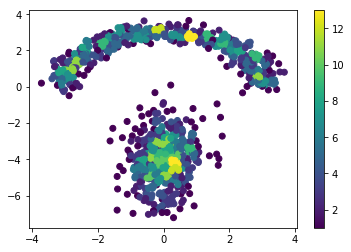

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)


print("Registros con y1")
print( len(y1) )
print("Registros con y2")
print( len(y2) )


equis=X[:,0]
ii=X[:,1]

hist, xedges, yedges = np.histogram2d(equis, ii,30)
xidx = np.clip(np.digitize(equis, xedges) - 1, 0, hist.shape[0] - 1)
yidx = np.clip(np.digitize(ii, yedges) - 1, 0, hist.shape[1] - 1)
c = hist[xidx, yidx]
plt.scatter(equis, ii, c=c)

plt.colorbar()
plt.show()



In [3]:
import matplotlib.pyplot as plt
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

### 1.b)

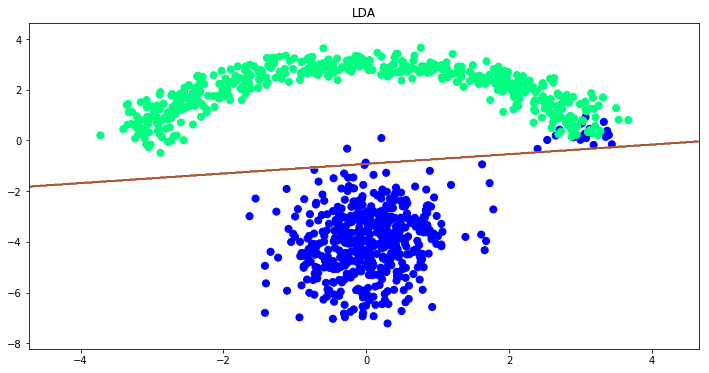

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA()
model_LDA.fit(X,y)
visualize_border(model_LDA,X,y,"LDA")

### 1.c)

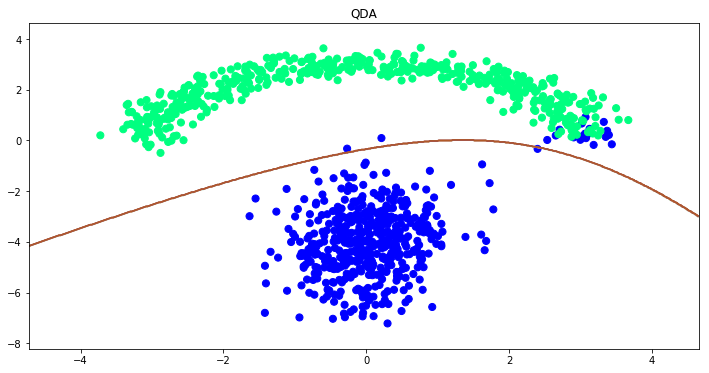

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_QDA = QDA()
model_QDA.fit(X,y)
visualize_border(model_QDA,X,y,"QDA")

### 1.d)

In [6]:
from sklearn.metrics import accuracy_score
y_true = y
y_pred_LDA = model_LDA.predict(X)
y_pred_QDA = model_QDA.predict(X)
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred_LDA)))
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred_QDA)))

Miss Classification Loss: 0.023000
Miss Classification Loss: 0.021000


In [7]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

### 1.e)

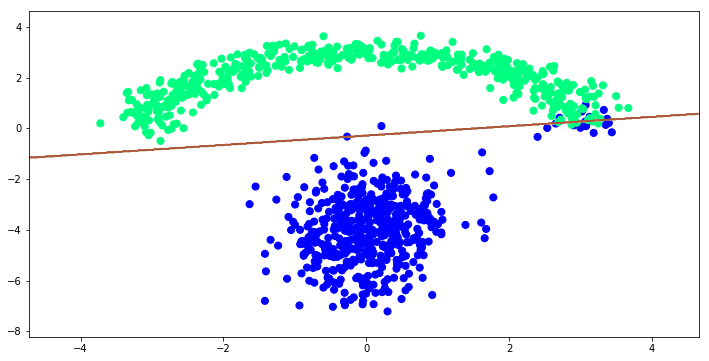

In [8]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

Parametro c en model.set_param

C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

### 1.f)

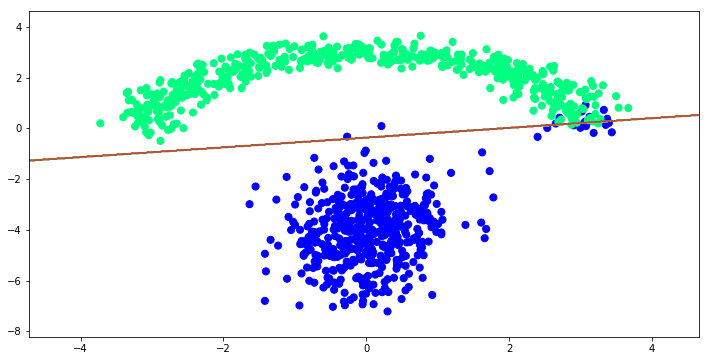

In [9]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

### 1.g)

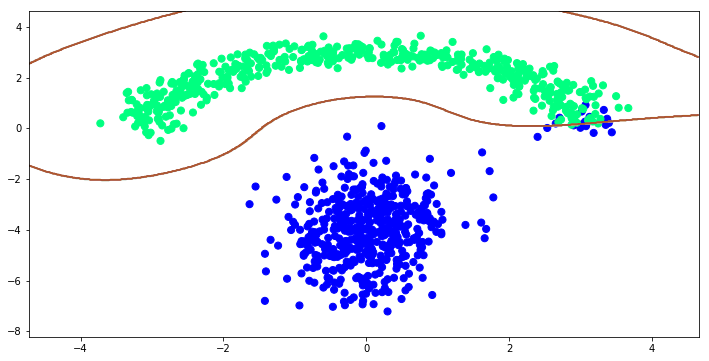

In [10]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf') #try poly
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

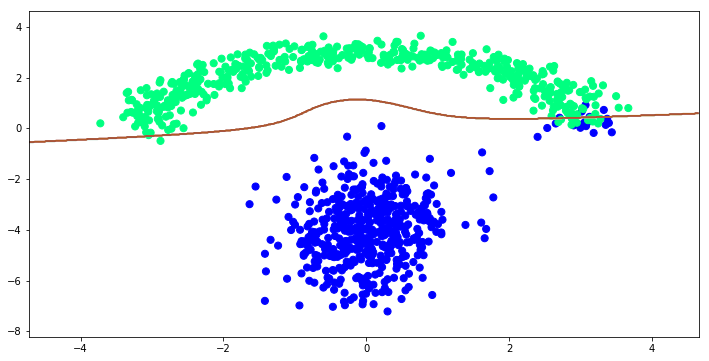

In [11]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly') #try poly
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

### 1.h)

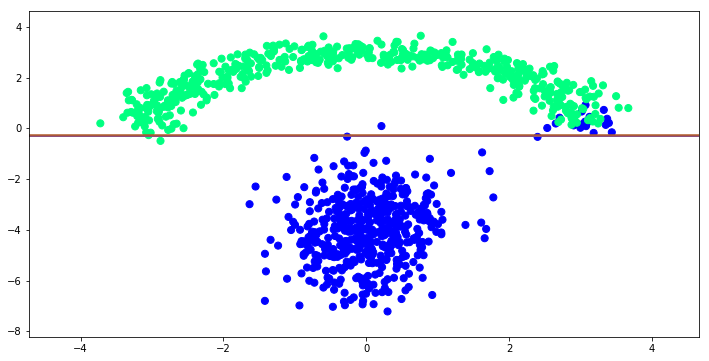

In [13]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model
p_min = 1 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

### 1.i)

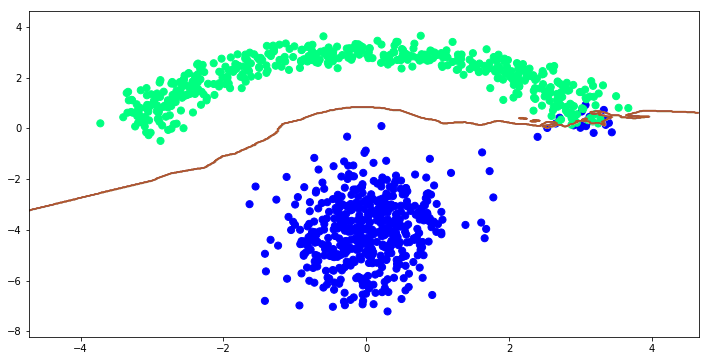

In [16]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model
p_min = 1 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

## 2

In [17]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

### 2.a)

In [31]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

print(df.head())
df.shape

  dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN


(176, 4)

### 1.b)

In [44]:
import os
os.getcwd()

'/home/nicomero/Escritorio/Maquinas de aprendizaje/tarea2maquinas'

In [48]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})#Aunlabelled no existe pero Aunlabelledtest si
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='heartbeat-sounds/set_a/') #MODIFICAR EL PATH A LA CARPETA CON LOS AUDIOS
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

### 1.c)

In [49]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
            1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
            2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
            0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]